#### Фильтры

In [3]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import filters, img_as_ubyte
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data

%matplotlib inline

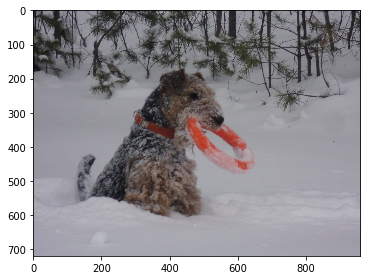

In [5]:
img = imread('img.jpg')
imshow(img);

In [6]:
# в оттенки ссерого
img_gray = rgb2gray(img)

#### Выделение границ
Одним из простейших в применении является фильтр, предназначенный для выделения наисходном изображении резких скачков яркости (**выделения границ, edge detection**). Данный фильтр использует свертку с ядром размером 3x3 к яркости изображения. Здесь используются следующие матрицы в качестве ядра свертки:

In [7]:
kernel_D_x = np.array([[0, 0, 0], 
                       [-1, 0, 1], 
                       [0, 0, 0]])

kernel_D_y = np.array([[0, 1, 0], 
                       [0, 0, 0], 
                       [0, -1, 0]])

Применение к исходному изображению фильтра $D_x$ и вывод результата преобразования.

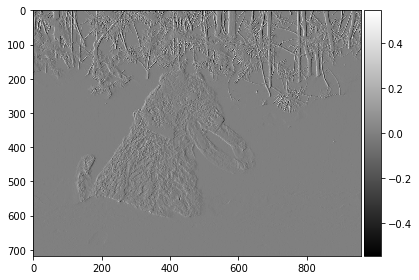

In [8]:
img_out_D_x = convolve2d(img_gray, kernel_D_x, mode = "valid")
imshow(img_out_D_x, cmap=plt.cm.gray);

Применение к исходному изображению фильтра $D_y$ и вывод результата преобразования.

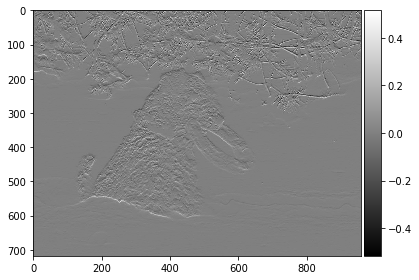

In [9]:
img_out_D_y = convolve2d(img_gray, kernel_D_y, mode = "valid")
imshow(img_out_D_y, cmap=plt.cm.gray);

#### Фильтр Превитта
Более сложный. Использует ядра свертки:

In [10]:
kernel_P_x = np.array([[-1, 0, 1], 
                       [-1, 0, 1], 
                       [-1, 0, 1]])

kernel_P_y = np.array([[-1, -1, -1], 
                       [0, 0, 0], 
                       [1, 1, 1]])

Применение к исходному изображению фильтра $P_x$ и вывод результата преобразования.

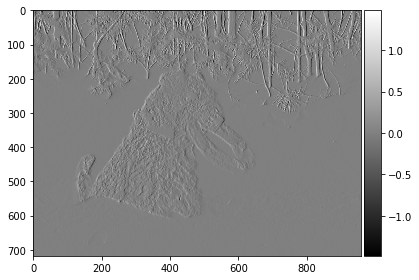

In [11]:
img_out_P_x = convolve2d(img_gray, kernel_P_x, mode = "valid")
imshow(img_out_P_x, cmap=plt.cm.gray);

Применение к исходному изображению фильтра $P_y$ и вывод результата преобразования.

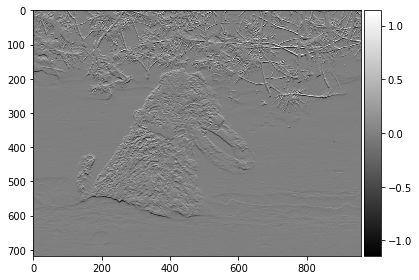

In [12]:
img_out_P_y = convolve2d(img_gray, kernel_P_y, mode = "valid")
imshow(img_out_P_y, cmap=plt.cm.gray);

####  Фильтр Собеля
Использует ядра свертки:

In [13]:
kernel_S_x = np.array([[-1, 0, 1], 
                       [-2, 0, 2], 
                       [-1, 0, 1]])

kernel_S_y = np.array([[-1, -2, -1], 
                       [0, 0, 0], 
                       [1, 2, 1]])

Применение к исходному изображению фильтра $S_x$ и вывод результата преобразования.

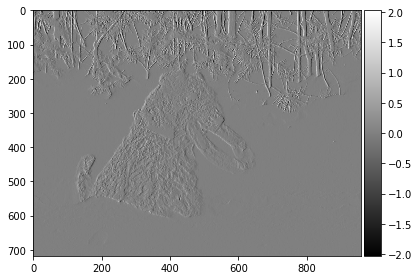

In [14]:
img_out_S_x = convolve2d(img_gray, kernel_S_x, mode = "valid")
imshow(img_out_S_x, cmap=plt.cm.gray);

Применение к исходному изображению фильтра $S_y$ и вывод результата преобразования.

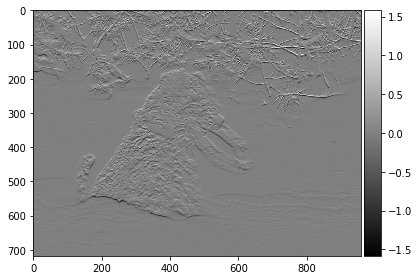

In [15]:
img_out_S_y = convolve2d(img_gray, kernel_S_y, mode = "valid")
imshow(img_out_S_y, cmap=plt.cm.gray);

####  Применение лапласиана

In [16]:
kernel_L_1 = np.array([[0, 1, 0], 
                       [1, -4, 1], 
                       [0, 1, 0]])

kernel_L_2 = np.array([[1, 1, 1], 
                       [1, -8, 1], 
                       [1, 1, 1]])

Применение к исходному изображению фильтра $L_1$ и вывод результата преобразования.

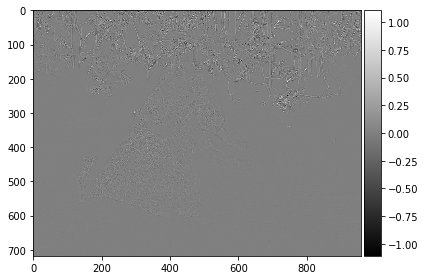

In [17]:
img_out_L_1 = convolve2d(img_gray, kernel_L_1, mode = "valid")
imshow(img_out_L_1, cmap=plt.cm.gray);

Применение к исходному изображению фильтра $L_2$ и вывод результата преобразования.

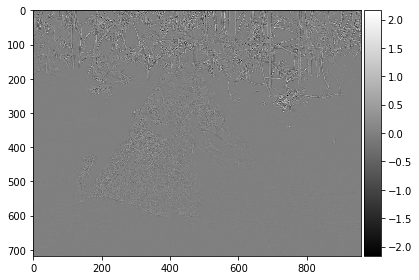

In [18]:
img_out_L_2 = convolve2d(img_gray, kernel_L_2, mode = "valid")
imshow(img_out_L_2, cmap=plt.cm.gray);

#### Фильтр тиснения
Фильтр тиснения использует ядро:

In [20]:
kernel_E_1 = np.array([[-2, 0, 0], 
                       [0, 1, 0], 
                       [0, 0, 2]])

kernel_E_2 = np.array([[-2, -1, 0], 
                       [-1, 1, 1], 
                       [0, 1, 2]])

Применение к исходному изображению фильтра $E_1$ и вывод результата преобразования.

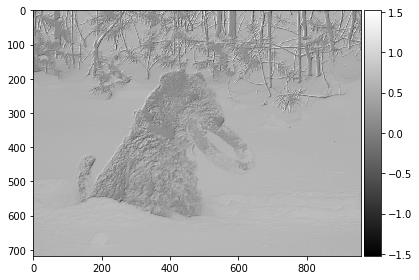

In [21]:
img_out_E_1 = convolve2d(img_gray, kernel_E_1, mode = "valid")
imshow(img_out_E_1, cmap=plt.cm.gray);

Применение к исходному изображению фильтра $E_2$ и вывод результата преобразования.

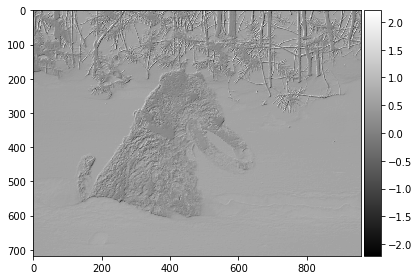

In [22]:
img_out_E_2 = convolve2d(img_gray, kernel_E_2, mode = "valid")
imshow(img_out_E_2, cmap=plt.cm.gray);

#### Фильтр повышения контрастности
Один из довольно простых фильтров, применяемых не к яркости изображения, а по отдельности к каждому из цветовых каналов, — фильтр повышения контрастности. Он использует ядро:

In [23]:
kernel_contract = np.array([[-1, -1, -1], 
                            [-1, 9, -1], 
                            [-1, -1, -1]])

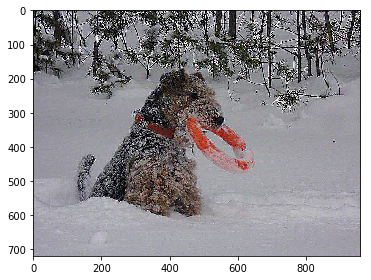

In [24]:
img_out = rgb2yuv(img)

Y = convolve2d(img_out[:, :, 0], kernel_contract, mode="same")
U = convolve2d(img_out[:, :, 1], kernel_contract, mode="same")
V = convolve2d(img_out[:, :, 2], kernel_contract, mode="same")

img_out_contrast = np.dstack((Y, U, V))
img_out_contrast = yuv2rgb(img_out_contrast)
img_out_contrast = np.clip(img_out_contrast, 0, 1)

imshow(img_out_contrast);